# TensorFlow2教程-自编码器

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

自动编码器的两个主要组成部分; 编码器和解码器
编码器将输入压缩成一小组“编码”（通常，编码器输出的维数远小于编码器输入）
解码器然后将编码器输出扩展为与编码器输入具有相同维度的输出
换句话说，自动编码器旨在“重建”输入，同时学习数据的有限表示（即“编码”）

##  1.导入数据

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from IPython.display import SVG
print(tf.__version__)

2.0.0-alpha0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 2.简单的自编码器

In [4]:
code_dim = 32
inputs = layers.Input(shape=(x_train.shape[1],), name='inputs')
code = layers.Dense(code_dim, activation='relu', name='code')(inputs)
outputs = layers.Dense(x_train.shape[1], activation='softmax', name='outputs')(code)

auto_encoder = keras.Model(inputs, outputs)
auto_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
code (Dense)                 (None, 32)                25120     
_________________________________________________________________
outputs (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


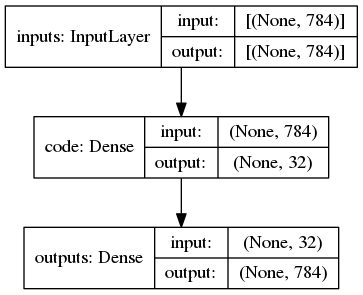

In [5]:
keras.utils.plot_model(auto_encoder, show_shapes=True)

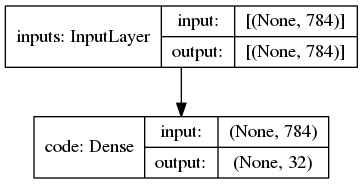

In [6]:
encoder = keras.Model(inputs,code)
keras.utils.plot_model(encoder, show_shapes=True)

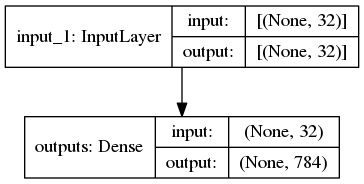

In [7]:
decoder_input = keras.Input((code_dim,))
decoder_output = auto_encoder.layers[-1](decoder_input)
decoder = keras.Model(decoder_input, decoder_output)
keras.utils.plot_model(decoder, show_shapes=True)

In [8]:
auto_encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

### 训练模型

In [9]:
%%time
history = auto_encoder.fit(x_train, x_train, batch_size=64, epochs=100, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 60us/sample - loss: 0.7063 - val_loss: 0.6794
Epoch 2/100
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6794 - val_loss: 0.6742
Epoch 3/100
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6767 - val_loss: 0.6729
Epoch 4/100
54000/54000 [==============================] - 3s 49us/sample - loss: 0.6758 - val_loss: 0.6726
Epoch 5/100
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6753 - val_loss: 0.6721
Epoch 6/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6750 - val_loss: 0.6719
Epoch 7/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6747 - val_loss: 0.6717
Epoch 8/100
54000/54000 [==============================] - 3s 47us/sample - loss: 0.6746 - val_loss: 0.6716
Epoch 9/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.674

Epoch 76/100
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6720 - val_loss: 0.6693
Epoch 77/100
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6720 - val_loss: 0.6692
Epoch 78/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6720 - val_loss: 0.6693
Epoch 79/100
54000/54000 [==============================] - 3s 48us/sample - loss: 0.6720 - val_loss: 0.6692
Epoch 80/100
54000/54000 [==============================] - 3s 49us/sample - loss: 0.6719 - val_loss: 0.6691
Epoch 81/100
54000/54000 [==============================] - 3s 51us/sample - loss: 0.6719 - val_loss: 0.6693
Epoch 82/100
54000/54000 [==============================] - 3s 49us/sample - loss: 0.6719 - val_loss: 0.6692
Epoch 83/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6719 - val_loss: 0.6692
Epoch 84/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6719 - val_loss: 0.6692
Epoch 85/100
54000/

In [10]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

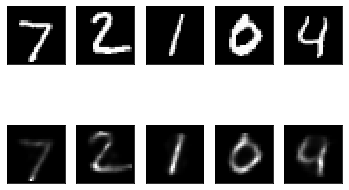

In [14]:
n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()